In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from vega_datasets import data


In [2]:
df = data.sf_temps()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
print(type(df.date))

df.date = pd.to_datetime(df.date)

df.info()
df.head()


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df = df.set_index(df.date)

df.head()

,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month_name()
df['weekday'] = df.date.dt.day_name()

df.head()

,temp,date,year,month,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00,2010,January,Friday
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00,2010,January,Friday
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00,2010,January,Friday
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00,2010,January,Friday
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00,2010,January,Friday


In [6]:
df.isna().sum()

temp       0
date       0
year       0
month      0
weekday    0
dtype: int64

In [7]:
df = df.drop(columns= ['date'])
df.head()

,temp,year,month,weekday
date,,,,
2010-01-01 00:00:00,47.8,2010,January,Friday
2010-01-01 01:00:00,47.4,2010,January,Friday
2010-01-01 02:00:00,46.9,2010,January,Friday
2010-01-01 03:00:00,46.5,2010,January,Friday
2010-01-01 04:00:00,46.0,2010,January,Friday


1. Resample by the day and take the average temperature. Visualize the average temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

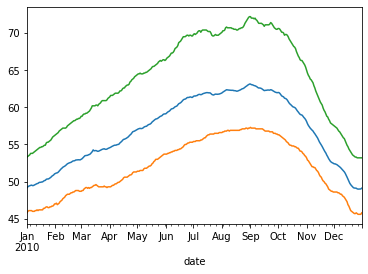

In [8]:
df.resample('D').temp.mean().plot()
df.resample('D').temp.min().plot()
df.resample('D').temp.max().plot()

4. Which month is the coldest, on average?


In [9]:
df.resample('M').temp.mean().idxmin().month_name()


'January'

5. Which month has the highest average temperature?


In [10]:
df.resample('M').temp.mean().idxmax().month_name()

'September'

6. Resample by the day and calculate the min and max temp for the day.

In [11]:
df['day_min'] = df.resample('D').temp.min()
df['day_max'] = df.resample('D').temp.max()
df_min_max = df[(df.day_min.notna()) & (df.day_max.notna())]

df_min_max.sample(100)

,temp,year,month,weekday,day_min,day_max
date,,,,,,
2010-10-14,56.8,2010,October,Thursday,54.9,69.0
2010-03-08,51.4,2010,March,Monday,49.1,59.3
2010-06-02,55.0,2010,June,Wednesday,53.7,66.6
2010-06-13,55.5,2010,June,Sunday,54.2,68.1
2010-08-12,58.1,2010,August,Thursday,56.9,70.6
...,...,...,...,...,...,...
2010-01-12,48.2,2010,January,Tuesday,46.2,54.3
2010-09-18,58.2,2010,September,Saturday,56.8,71.1
2010-06-21,56.2,2010,June,Monday,54.9,69.5


In [12]:
seattle_wx = data.seattle_weather()

seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [13]:
seattle_wx.date = pd.to_datetime(seattle_wx.date)
seattle_wx['week_day'] = seattle_wx.date.dt.day_name()
seattle_wx['month'] = seattle_wx.date.dt.month_name()
seattle_wx['year'] = seattle_wx.date.dt.year


In [14]:
seattle_wx = seattle_wx.set_index(seattle_wx.date)
seattle_wx.info()
seattle_wx.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   week_day       1461 non-null   object        
 7   month          1461 non-null   object        
 8   year           1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 114.1+ KB


,date,precipitation,temp_max,temp_min,wind,weather,week_day,month,year
date,,,,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January,2012
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January,2012
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January,2012
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January,2012
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January,2012


In [15]:
seattle_wx = seattle_wx.rename(columns= {'precipitation': 'precip'})
seattle_wx.head()

,date,precip,temp_max,temp_min,wind,weather,week_day,month,year
date,,,,,,,,,
2012-01-01,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January,2012
2012-01-02,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January,2012
2012-01-03,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January,2012
2012-01-04,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January,2012
2012-01-05,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January,2012


In [20]:
high_precip_month = seattle_wx.resample('M').precip.max().idxmax().month_name()
high_precip_month_yr = seattle_wx.resample('M').precip.max().idxmax().year

print(f'Month & year with highest precipitation: {high_precip_month, high_precip_month_yr}')

Month & year with highest precipitation: ('March', 2015)


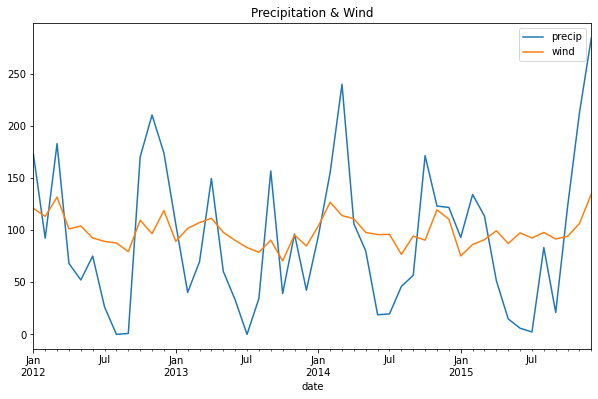

In [27]:
plt.figure(figsize=(10,6))

#plt.subplot(121)
seattle_wx.resample('M').precip.sum().plot()
#plt.xlabel('Months')
#plt.ylabel('Amount')
#plt.title('Precipitation')
#plt.subplot(122)
seattle_wx.resample('M').wind.sum().plot()
#plt.xlabel('Month')
#plt.ylabel('Wind amount')
plt.title('Precipitation & Wind')
plt.legend()


In [28]:
high_wind_month = seattle_wx.resample('M').wind.max().idxmax().month_name()
high_wind_month_yr = seattle_wx.resample('M').wind.max().idxmax().year

print(f'Month & year with highest wind: {high_wind_month, high_wind_month_yr}')

Month & year with highest wind: ('December', 2012)


In [52]:
sunny_days = seattle_wx[seattle_wx.weather == "sun"]
sunny_days.resample('Y').weather.count().nlargest(n=1)


date
2014-12-31    211
Freq: A-DEC, Name: weather, dtype: int64

In [56]:
rainy_days = seattle_wx[seattle_wx.weather == 'rain']
rainy_days.resample('M').weather.count().nlargest(n=1)

date
2012-11-30    25
Freq: M, Name: weather, dtype: int64

In [74]:
seattle_wx[seattle_wx.precip > 0].resample('D').precip.count().groupby(seattle_wx.month).sum().idxmax()

'December'

In [65]:
flights_df = data.flights_20k()

flights_df.info()
flights_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [66]:
flights_df = flights_df.set_index(flights_df.date)
flights_df.drop(columns = ['date'], inplace=True)
flights_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [83]:
flights_df['day'] = flights_df.index.day_name()
flights_df.head()


,delay,distance,origin,destination,day
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday
2001-03-30 21:45:00,-2,229,STL,IND,Friday


In [85]:
flights_df['month'] = flights_df.index.month_name()
flights_df.head()

,delay,distance,origin,destination,day,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,Saturday,January
2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,Sunday,February
2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday,January
2001-03-30 21:45:00,-2,229,STL,IND,Friday,March


In [ ]:
flights_df[flights_df.delay > 0]